# 단순이동평균

- 특정 기간 동안 금융 자산 가격의 합/ 기간수

In [1]:
import statistics as stats
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data

In [7]:
start_date = '2015-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='goog_data.pkl'

In [14]:
try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(750)

close = goog_data['Close']


In [15]:
goog_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-09,503.537537,493.435272,503.377991,494.811493,2071371.0,494.811493
2015-01-12,494.618011,486.225067,493.584869,491.201416,2326771.0,491.201416
2015-01-13,501.602844,491.041840,497.474182,494.821472,2370490.0,494.821472
2015-01-14,501.852173,491.650177,493.295654,499.498627,2235721.0,499.498627
2015-01-15,504.295471,496.397156,504.185760,500.416107,2715836.0,500.416107
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


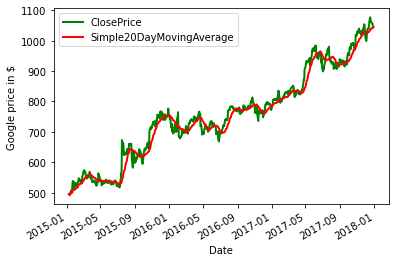

In [16]:
time_period = 20 # 평균을 적용할 일수
history = []     # 가격 히스토리를 추적하고자
sma_values = []  # 단순 이동 평균값을 추적하고자

for close_price in close:
    history.append(close_price)
    if len(history) > time_period: # 최근 기간(time_period)의 가격 평균만 구하므로 오랜 가격은 제거
        del (history[0])
    sma_values.append(stats.mean(history))  

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

In [17]:
goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage
Date,,,,,,,,
2015-01-09,503.537537,493.435272,503.377991,494.811493,2071371.0,494.811493,494.811493,494.811493
2015-01-12,494.618011,486.225067,493.584869,491.201416,2326771.0,491.201416,491.201416,493.006454
2015-01-13,501.602844,491.041840,497.474182,494.821472,2370490.0,494.821472,494.821472,493.611460
2015-01-14,501.852173,491.650177,493.295654,499.498627,2235721.0,499.498627,499.498627,495.083252
2015-01-15,504.295471,496.397156,504.185760,500.416107,2715836.0,500.416107,500.416107,496.149823
...,...,...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995,1060.119995,1040.854999
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990,1056.739990,1040.981500
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995,1049.369995,1041.079498
